In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [263]:
class MCl_LogisticRegression:
    
    def __init__(self,lrate=0.0001,nIter=50):
        self.lrate = lrate
        self.nIter = nIter
    
    def fit(self,X,Y):
        self.classes = np.unique(Y)
        ar = np.zeros((1 + X.shape[1])*len(self.classes))
        self.theta = ar.reshape(len(self.classes),1 + X.shape[1])
        
        for i in range(len(self.classes)):
            
            for _ in range(self.nIter):
                Y1 = np.where(Y==self.classes[i],self.classes[i],-1)
                error = self.hypothesis(X,i) - Y1
                t = self.lrate/X.shape[0]
                self.theta[i,1:] = self.theta[i,1:] - (t * np.dot(error,X))
                self.theta[i,0] = self.theta[i,0] - (t * error.sum())
        
        
    def hypothesis(self, X,cl):
        return np.where(self.predict(X,cl) >= 0.5, self.classes[cl], -1)
                
    def predict(self, X,cl):
        return 1/(1 + 2.71 ** (-1 * (np.dot(X,self.theta[cl,1:]) + self.theta[cl,0])))
        

In [264]:
irisData = pd.read_csv('Iris.csv')
irisData.loc[49]

Sepal_length              5
Sepal_width             3.3
Petal_length            1.4
Petal_width             0.2
Type            Iris-setosa
Name: 49, dtype: object

In [265]:
Y = irisData.iloc[0:25,4].values 
Y = np.append(Y,irisData.iloc[50:75,4].values)
Y = np.append(Y,irisData.iloc[125:150,4].values)

In [266]:
np.unique(Y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [267]:
Y = np.where(Y=='Iris-setosa',1,Y)
Y = np.where(Y=='Iris-versicolor',2,Y)
Y = np.where(Y=='Iris-virginica',3,Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=object)

In [268]:
X = np.append(irisData.iloc[0:25, [0, 2]].values,irisData.iloc[50:75, [0, 2]].values,axis=0)
X = np.append(X,irisData.iloc[125:150, [0, 2]].values,axis=0)
X.shape

(75, 2)

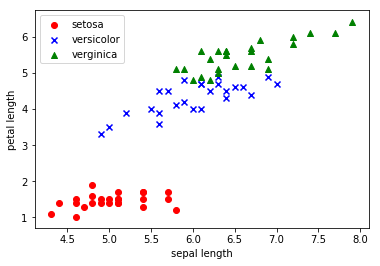

In [269]:
plt.scatter(X[:25,0], X[:25,1], color = 'red', marker='o', label='setosa')
plt.scatter(X[25:50,0], X[25:50,1], color='blue', marker='x', label='versicolor')
plt.scatter(X[50:75,0], X[50:75,1], color='green', marker='^', label='verginica')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [270]:
lRegress = MCl_LogisticRegression(lrate=0.000001, nIter=50)
lRegress.fit(X,Y)

In [271]:
lRegress.theta

array([[  6.66666667e-07,   1.64800000e-06,  -3.59733333e-06],
       [ -8.80000000e-07,  -4.40800000e-06,   8.53600000e-06],
       [ -7.68000000e-06,  -2.04693333e-05,   2.10933333e-05]])

In [279]:
lRegress.hypothesis(irisData.iloc[50:75, [0, 2]].values,1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])